In [325]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import regex as re
from collections import Counter
# import requests
# import ast
# from bs4 import BeautifulSoup as bsoup

#so I can get sounds to play
# from IPython.display import Audio
# wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
#So I can see multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Commented out so I don't accidentally rerun it
df = pd.read_csv('recipe_overclean.csv', sep = ",", quotechar = '"', dtype=object, index_col=0)

In [ ]:
# df["TotalIng"] = pd.to_numeric(df["TotalIng"])
df.head(2)

In [ ]:
len(df)
df.dtypes

In [ ]:
df['TotalIng'] = df.isnull().sum(axis=1)
df.sample(10)

In [ ]:
agg1 = df.groupby("Website").size()
agg2 = 76 - df.groupby('Website')[["TotalIng"]].mean()
website = pd.concat([agg1, agg2], axis=1, sort=False)
website.rename(columns={0: 'NumRecipes', 'TotalIng': 'AveNumIngr'}, inplace=True)
website

In [ ]:
# Summary statistic of each website's recipes
wb_topsum = website.sort_values(by='NumRecipes',ascending=False).head(20)
wb_topave = website.sort_values(by='AveNumIngr',ascending=False).head(20)

In [ ]:
wb_topsum
wb_topave

In [ ]:
plt.figure(figsize=(15,10))
wb_sum.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Website of Origin")
plt.ylabel("Number of Recipes")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
wb_topsum.NumRecipes.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Website of Origin")
plt.ylabel("Number of Recipes")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
wb_topsum.AveNumIngr.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Website of Origin")
plt.ylabel("Average Number of Ingredients")
plt.show()

In [ ]:
#TODO write a conversion function, then plot it
df.groupby("Website")['TotalTime'].sum()

In [458]:
ingredients = pd.read_csv('ingredients_agg.csv', names = ['Title','AggIngredients'], sep = ",", quotechar = '"', skipinitialspace=True, error_bad_lines = False, dtype=object)

In [459]:
#Cleanup remove commas, all lowercase, stem select words
ingredients.Title = ingredients.Title.str.replace(',',' ')
ingredients.AggIngredients = ingredients.AggIngredients.str.replace(',',' ')

ingredients.Title = ingredients.Title.str.lower()
ingredients.AggIngredients = ingredients.AggIngredients.str.lower()

ingredients.Title = ingredients.Title.str.replace('potatoes','potato')
ingredients.AggIngredients = ingredients.AggIngredients.str.replace('potatoes','potato')
ingredients.Title = ingredients.Title.str.replace('potatoes','potato')
ingredients.AggIngredients = ingredients.AggIngredients.str.replace('tomatoes','tomato')
ingredients.Title = ingredients.Title.str.replace('eggs','egg')
ingredients.AggIngredients = ingredients.AggIngredients.str.replace('eggs','egg')

In [461]:
ingredients.AggIngredients.head()

Website                                                 aggingredients
100daysofrealfood    1½ pounds potato    1 1/2 pounds potato such a...
101cookbooks         toasted sesame oil  1 cup whole coconut milk  ...
101cookingfortwo     2 pounds of skinless boneless chicken breast  ...
12tomatoes           1/2 onion  diced  3/4 cup plain greek yogurt  ...
Name: AggIngredients, dtype: object

In [462]:
wordfreq_Title = ingredients.Title.apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0)

In [463]:
wordfreq_Title = wordfreq_Title[2:]

In [ ]:
wordfreq_AggIng = ingredients.AggIngredients.apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0)

In [ ]:
wordfreq_AggIng = wordfreq_AggIng[2:]

plt.figure(figsize=(15,10))
wordfreq_Title.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

Ridiculous, so let's look at a smaller data set

In [444]:
wordfreq_Title_top = wordfreq_Title.sort_values(ascending=False).head(50)
wordfreq_Title_top

with          34430.0
and           29734.0
chicken       10838.0
chocolate      6848.0
sauce          6442.0
salad          6147.0
cream          4521.0
cheese         4343.0
cake           4204.0
cookies        3736.0
grilled        3683.0
butter         3654.0
roasted        3537.0
pork           3288.0
pie            3009.0
lemon          2976.0
beef           2879.0
bread          2795.0
recipe         2541.0
red            2510.0
apple          2466.0
shrimp         2461.0
soup           2435.0
rice           2378.0
&              2363.0
tomato         2358.0
potato         2352.0
sweet          2201.0
pumpkin        2141.0
baked          2109.0
green          2029.0
peanut         1916.0
spicy          1913.0
in             1910.0
potatoes       1884.0
garlic         1841.0
coconut        1817.0
bacon          1778.0
lamb           1720.0
white          1711.0
banana         1686.0
salmon         1678.0
ice            1659.0
orange         1644.0
strawberry     1623.0
turkey    

<Figure size 1080x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'Word')

Text(0, 0.5, 'Frequency')

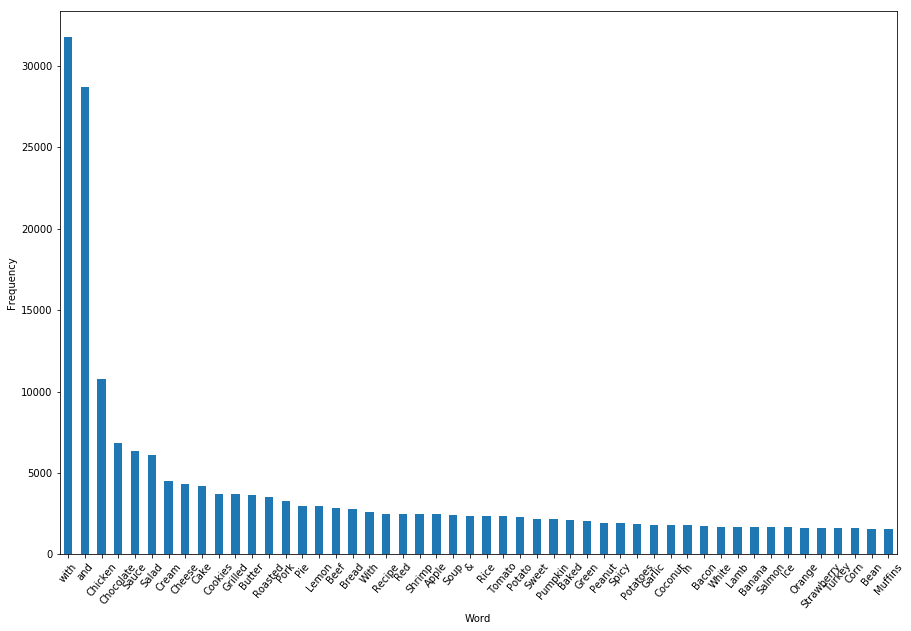

In [392]:
plt.figure(figsize=(15,10))
wordfreq_Title_top.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

Remove high frequency words ",", "with", "and" by adding to stopwords.

In [445]:
wordfreq_Ing_top = wordfreq_AggIng.sort_values(ascending=False).head(50)
wordfreq_Ing_top

nan            8703469.0
1               438224.0
2               242623.0
cup             225305.0
cups            156492.0
tablespoons     138902.0
teaspoon        135479.0
1/2             125735.0
chopped         105821.0
salt            100182.0
teaspoons        86192.0
and              82910.0
3                80734.0
fresh            80231.0
½                77353.0
oil              74844.0
tablespoon       74282.0
pepper           73181.0
or               72213.0
sugar            70703.0
1/4              67254.0
4                63968.0
ground           62471.0
butter           55360.0
for              52752.0
whole            51564.0
large            47858.0
garlic           45440.0
¼                44255.0
olive            43489.0
sliced           42004.0
flour            41297.0
into             40906.0
ounces           39790.0
cut              39315.0
black            37469.0
to               36540.0
finely           34081.0
juice            33347.0
red              33174.0


<Figure size 1080x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'Word')

Text(0, 0.5, 'Frequency')

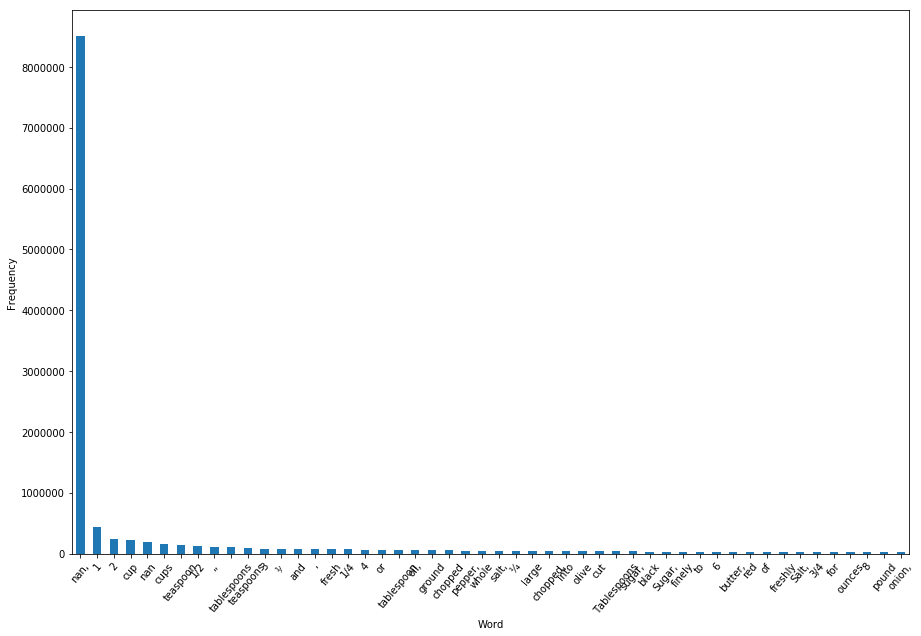

In [346]:
plt.figure(figsize=(15,10))
wordfreq_Ing_top.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [419]:
# Create stopword list:
stopwords = set(STOPWORDS)
stop1 = ['a', 'and', 'the', 'or', 'of', 'if', 'on', 'but','with',',','"','"',
        'pinch', 'left', 'peeled', 'cut', 'chopped', 'sliced','&',
        'small', 'medium', 'large', 'whole', 'into', 'in', 'to',
        'plus', 'more', 'thick', 'halved', 'quartered', 'good',
        'inch', 'inches', 'about', 'sea', 'end', 'approximate',
        'approximately', 'very', 'finely', 'for', 'nan', 'none', 
         'recipe', 'freshly','ground']
measurement = ['teaspoon', 'tsp', 'tablespoon', 'tbsp',
               'teaspoons', 'tablespoons', 
                'ounce', 'oz', 'cup', 'pint', 'pt', 
                'ounces', 'cups', 'pints',
                'quart', 'qt', 'gallon', 'gal',
                'quarts', 'gallons',
               'pound', 'lb', 'gram', 'kilogram',
               'pounds', 'lbs', 'grams', 'kilograms',
                'milliliter', 'liter', 'weight',
                'milliliters', 'liters']
amounts = ["1", "one", "2", "two", "3", 'three','4','four',
           '5','five','6','six','7','seven','8','eight','9',
           'nine','10','ten','½', '1/2','half', '1½','¼','1/4','3/4','1/3','¾','1-½']
stopwords.update(stop1,measurement,amounts)

In [457]:
#Remove stopwords 
wordfreq_AggIng = wordfreq_AggIng[~wordfreq_AggIng.index.isin(stopwords)]
wordfreq_Title = wordfreq_Title[~wordfreq_Title.index.isin(stopwords)]

In [447]:
wordfreq_Title_top = wordfreq_Title.sort_values(ascending=False).head(50)
wordfreq_Title_top
wordfreq_Ing_top = wordfreq_AggIng.sort_values(ascending=False).head(50)
wordfreq_Ing_top

chicken       10838.0
chocolate      6848.0
sauce          6442.0
salad          6147.0
cream          4521.0
cheese         4343.0
cake           4204.0
cookies        3736.0
grilled        3683.0
butter         3654.0
roasted        3537.0
pork           3288.0
pie            3009.0
lemon          2976.0
beef           2879.0
bread          2795.0
red            2510.0
apple          2466.0
shrimp         2461.0
soup           2435.0
rice           2378.0
tomato         2358.0
potato         2352.0
sweet          2201.0
pumpkin        2141.0
baked          2109.0
green          2029.0
peanut         1916.0
spicy          1913.0
potatoes       1884.0
garlic         1841.0
coconut        1817.0
bacon          1778.0
lamb           1720.0
white          1711.0
banana         1686.0
salmon         1678.0
ice            1659.0
orange         1644.0
strawberry     1623.0
turkey         1615.0
corn           1605.0
bean           1561.0
muffins        1556.0
pasta          1532.0
salsa     

salt           100182.0
fresh           80231.0
oil             74844.0
pepper          73181.0
sugar           70703.0
butter          55360.0
garlic          45440.0
olive           43489.0
flour           41297.0
black           37469.0
juice           33347.0
red             33174.0
cream           31758.0
onion           31042.0
powder          30507.0
lemon           30210.0
cloves          29062.0
minced          29036.0
cheese          28436.0
water           28182.0
white           27424.0
vanilla         26729.0
grated          26122.0
kosher          25999.0
unsalted        25805.0
chicken         25639.0
leaves          25462.0
sauce           25084.0
milk            24672.0
baking          22859.0
eggs            22258.0
egg             21469.0
dried           21262.0
diced           21122.0
thinly          18624.0
extract         18605.0
vinegar         18098.0
divided         17981.0
all-purpose     17941.0
vegetable       17690.0
brown           17689.0
pieces          

<Figure size 1080x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'Word')

Text(0, 0.5, 'Frequency')

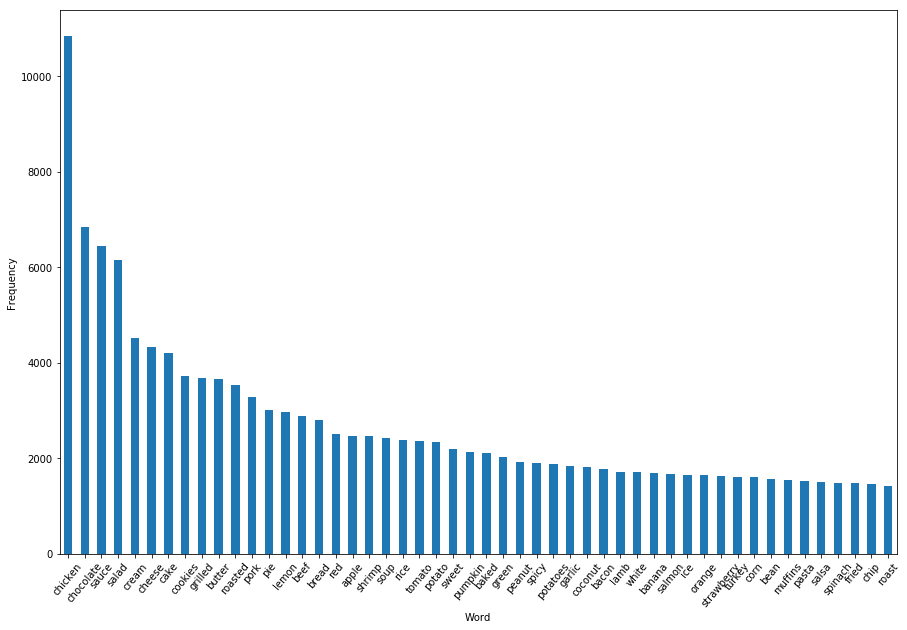

In [448]:
plt.figure(figsize=(15,10))
wordfreq_Title_top.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

<Figure size 1080x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0.5, 0, 'Word')

Text(0, 0.5, 'Frequency')

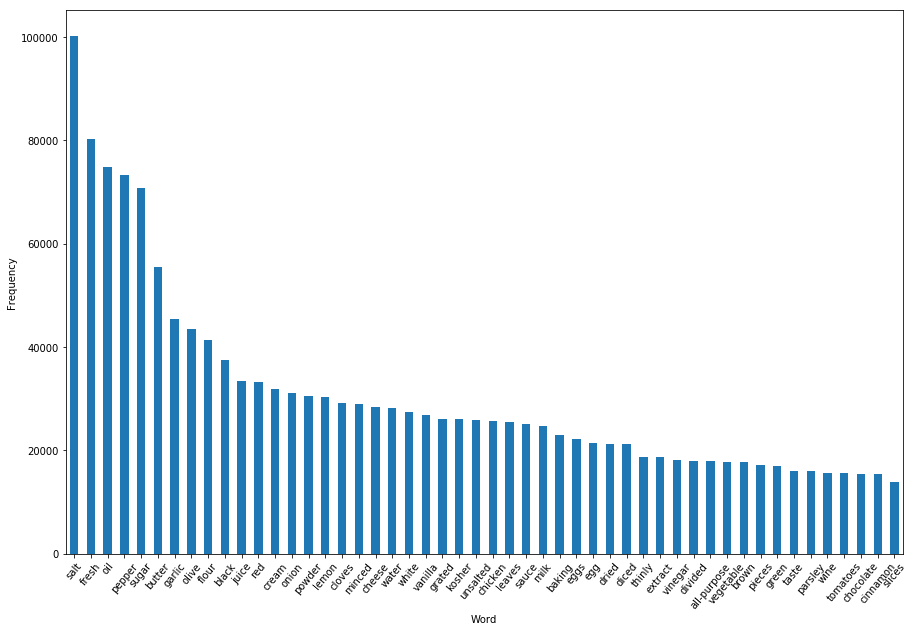

In [449]:
plt.figure(figsize=(15,10))
wordfreq_Ing_top.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def wc(site,section, pic=None):
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",mask=pic).generate(ingredients.loc[site,section])
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
food_mask = np.array(Image.open("CoveredHotPlate.jpg"))
food_mask

In [ ]:
#swap number 0 to 255
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
#Sometimes the mask needs to be transformed?
#Transform your mask into a new one that will work with the function:
transformed_food_mask = np.ndarray((food_mask.shape[0],food_mask.shape[1]), np.int32)

for i in range(len(food_mask)):
    for j in range(len(food_mask[i])):
        transformed_food_mask[i][j] = list(map(transform_format, food_mask[i][j]))

In [ ]:
wb_topsum

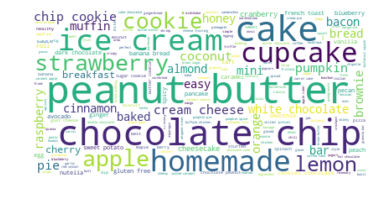

In [450]:
wc('tastykitchen','Title')

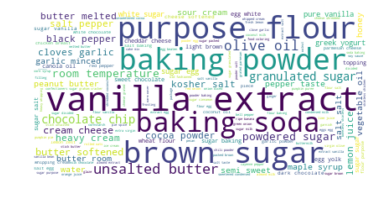

In [451]:
wc('tastykitchen','AggIngredients')

In [ ]:
wc('epicurious','Title')

In [ ]:
wc('epicurious','AggIngredients')

In [ ]:
wc('foodnetwork','Title')

In [ ]:
wc('foodnetwork','AggIngredients')

In [ ]:
wc('bonappetit','Title')

In [ ]:
wc('bonappetit','AggIngredients')

In [ ]:
wc('bonappetit','Title',food_mask)

In [ ]:
wc('cookstr','Title')

In [ ]:
wc('cookstr', 'AggIngredients')

In [ ]:
ingredients['Title'].str.cat()

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ingredients['Title'].str.cat())
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ingredients['AggIngredients'].str.cat())
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This dataset started its life on a various recipe database websites.  Through webscraper code, utilizing BeautifulSoup and open source code as a base, the initial csv of 155,876 lines listed the url, recipe title, total time, and each ingredient as a separate column.  Recipe titles or ingredients which internally contained commas were surrounded by double quotes.

The recipe scraper provides ingredients as they are written within the websites. We will need to parse out the amounts from the ingredients themselves and occasionally additional instructions. (1 10-oz. package frozen blackberries (about 2 cups), thawed) (2 large fresh fennel bulbs, trimmed, each cut vertically into 12 wedges with some core attached) The amounts and the ingredients will need to be normalized to merge with the nutritional dataset.